In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
path = os.getcwd()
seq0_output = os.listdir(path + '/seq0_output')
df = pd.read_csv(path + '/seq0_output/table_ekf_full_seq0.csv')
df.head()

,Time (s),X (m),Y (m),Yaw (deg)
0,-1.769098e+09,0.0042,0.0,0.04
1,9.200000e-02,0.0085,0.0,0.02
2,9.200000e-02,0.0148,0.0,0.02
3,9.200000e-02,0.0189,0.0,0.11
4,9.200000e-02,0.0231,0.0,0.15


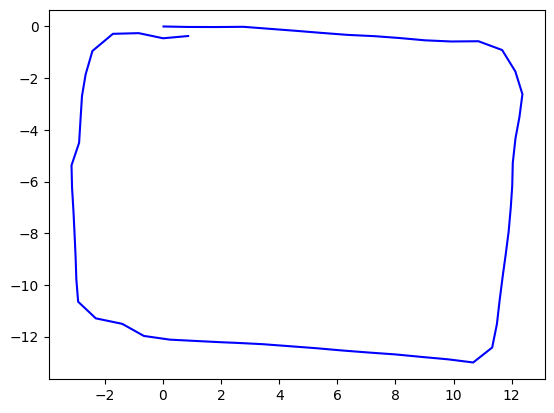

In [16]:
df = pd.read_csv(path + '/seq0_output/table_slam_(truth)_full_seq0.csv')
plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')

Plotting: table_slam_(truth)_full_seq0.csv
Plotting: table_icp_full_seq0.csv
Plotting: table_ekf_full_seq0.csv
Plotting: table_wheel_(part3)_full_seq0.csv


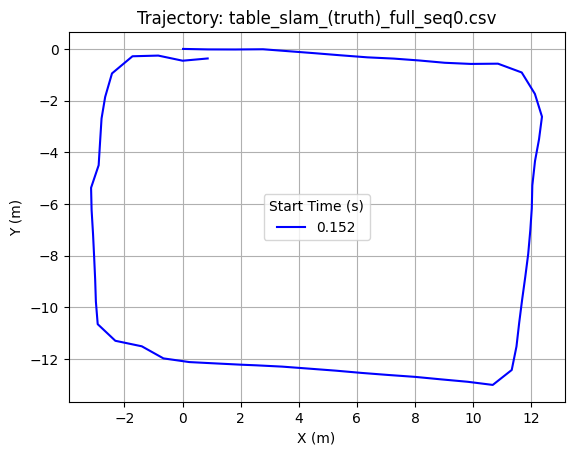

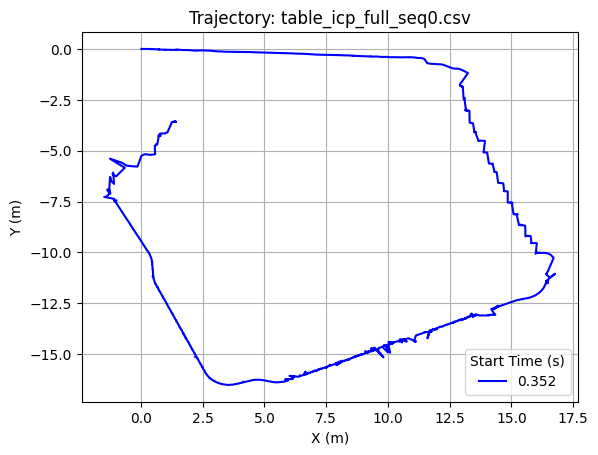

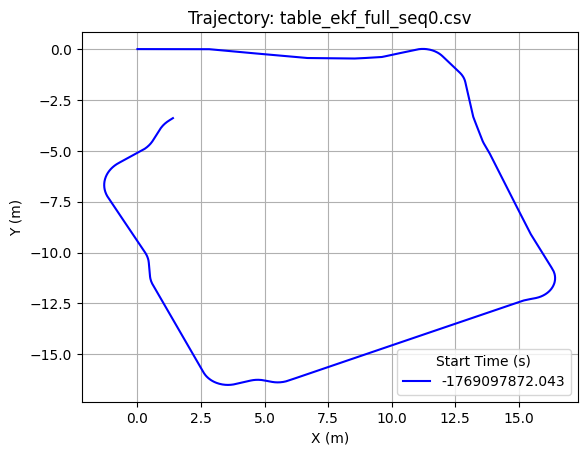

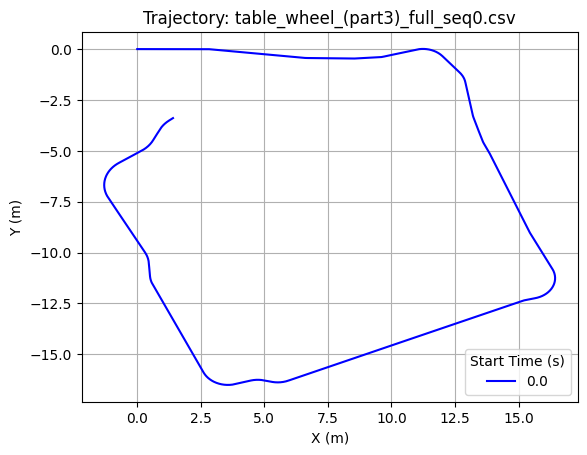

In [21]:
path = os.getcwd()
folder_path = os.path.join(path, 'seq0_output')
seq0_output = os.listdir(folder_path)

for file_name in seq0_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()

Plotting: table_ekf_full_seq1.csv
Plotting: table_slam_(truth)_full_seq1.csv
Plotting: table_icp_full_seq1.csv
Plotting: table_wheel_(part3)_full_seq1.csv


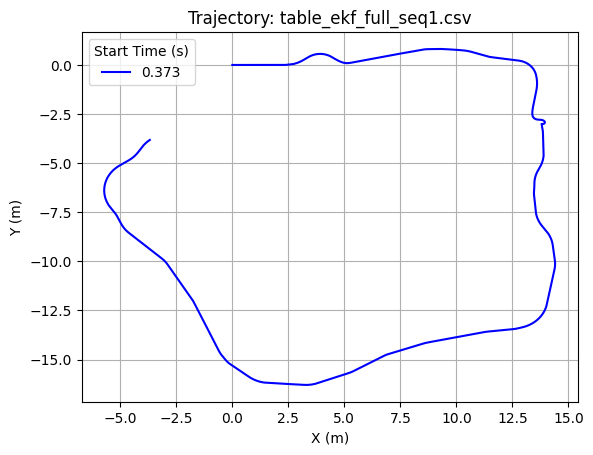

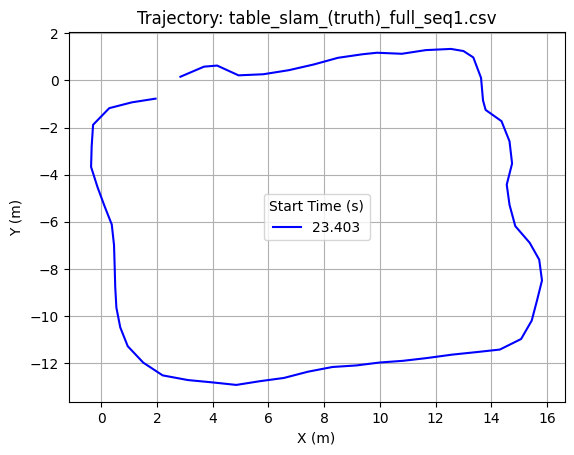

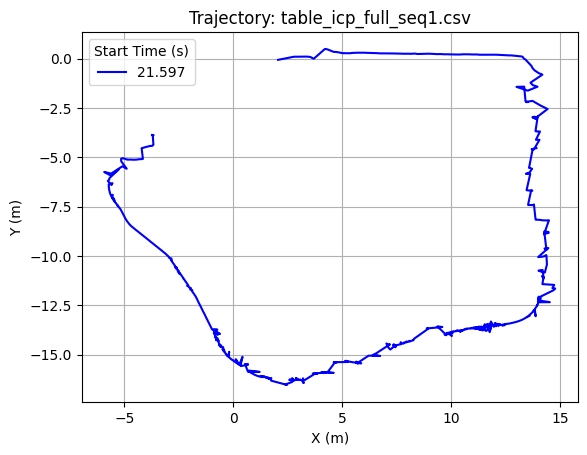

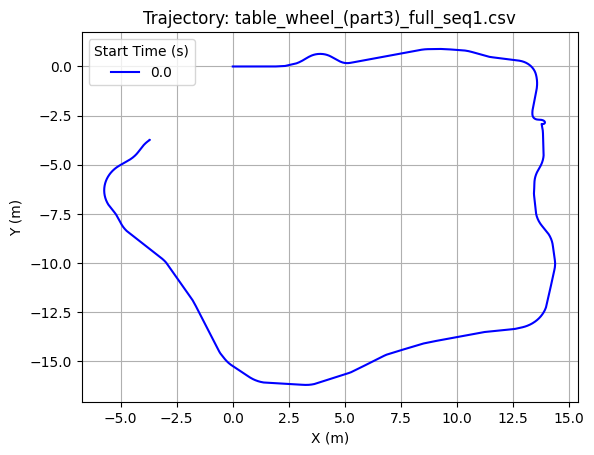

In [22]:
path = os.getcwd()
folder_path = os.path.join(path, 'seq1_output')
seq1_output = os.listdir(folder_path)

for file_name in seq1_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()

Plotting: table_slam_(truth)_full_seq2.csv
Plotting: table_ekf_full_seq2.csv
Plotting: table_wheel_(part3)_full_seq2.csv
Plotting: table_icp_full_seq2.csv


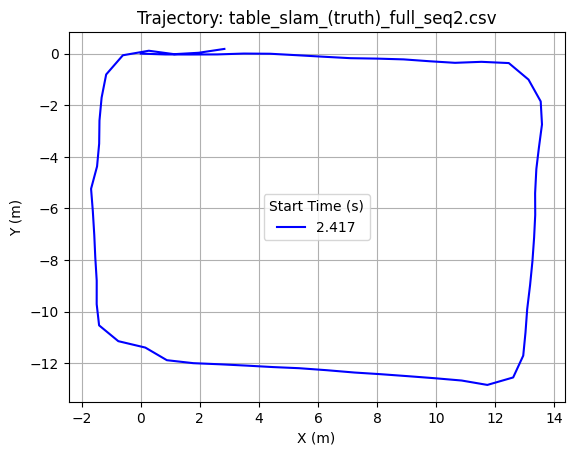

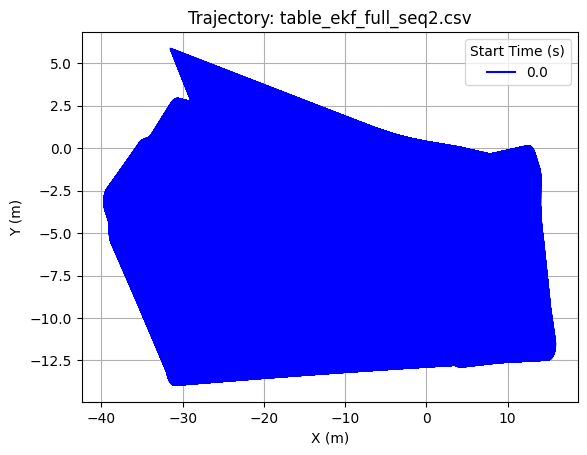

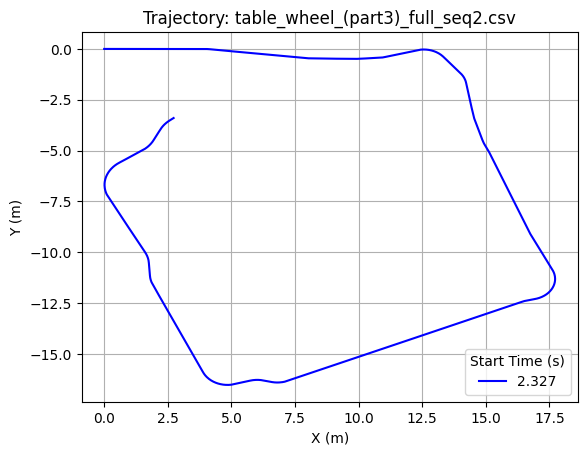

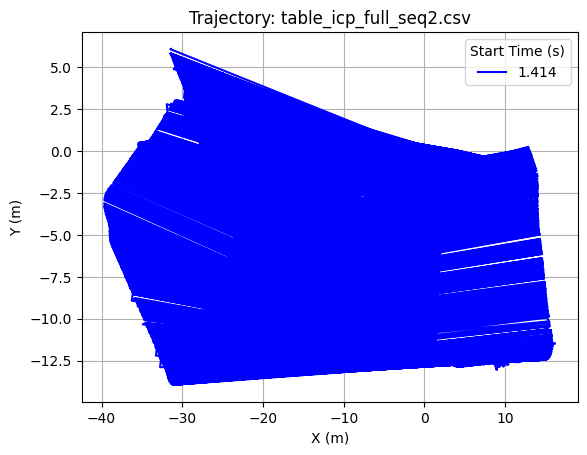

In [23]:
path = os.getcwd()
folder_path = os.path.join(path, 'tune4')
seq1_output = os.listdir(folder_path)

for file_name in seq1_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()